### Importing Libraries

In [67]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score,StratifiedKFold

from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import KFold
#import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import os

Importing Data File

In [68]:

dir_path = os.getcwd()


# Load dataset
dataFrame = pd.read_csv('../../AIBetic2Dataset/balanced_diabetes_data.csv')


In [69]:

#Showing head of the dataset
dataFrame.head(50)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


In [70]:

#Showing null values 
dataFrame.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [71]:


#Showing the type of the dataset
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 1072 non-null   int64 
 1   Gender              1072 non-null   object
 2   Polyuria            1072 non-null   object
 3   Polydipsia          1072 non-null   object
 4   sudden weight loss  1072 non-null   object
 5   weakness            1072 non-null   object
 6   Polyphagia          1072 non-null   object
 7   Genital thrush      1072 non-null   object
 8   visual blurring     1072 non-null   object
 9   Itching             1072 non-null   object
 10  Irritability        1072 non-null   object
 11  delayed healing     1072 non-null   object
 12  partial paresis     1072 non-null   object
 13  muscle stiffness    1072 non-null   object
 14  Alopecia            1072 non-null   object
 15  Obesity             1072 non-null   object
 16  class               1072

### Distribution of Different Features

<Axes: xlabel='class', ylabel='count'>

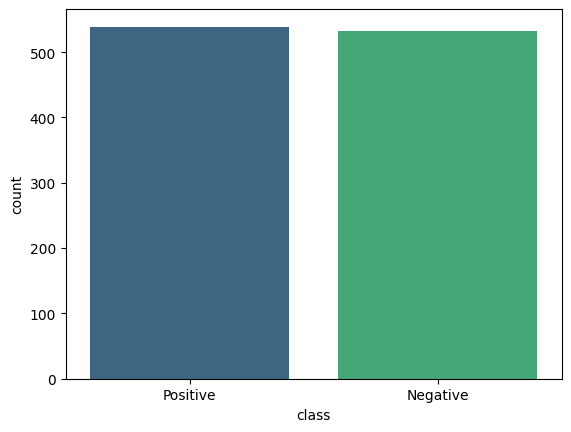

In [72]:
# Create a count plot for the 'class' column of the DataFrame
class_distribution_plot = sns.countplot(x='class', hue='class', data=dataFrame, palette='viridis', legend=False)

# Display the plot
class_distribution_plot


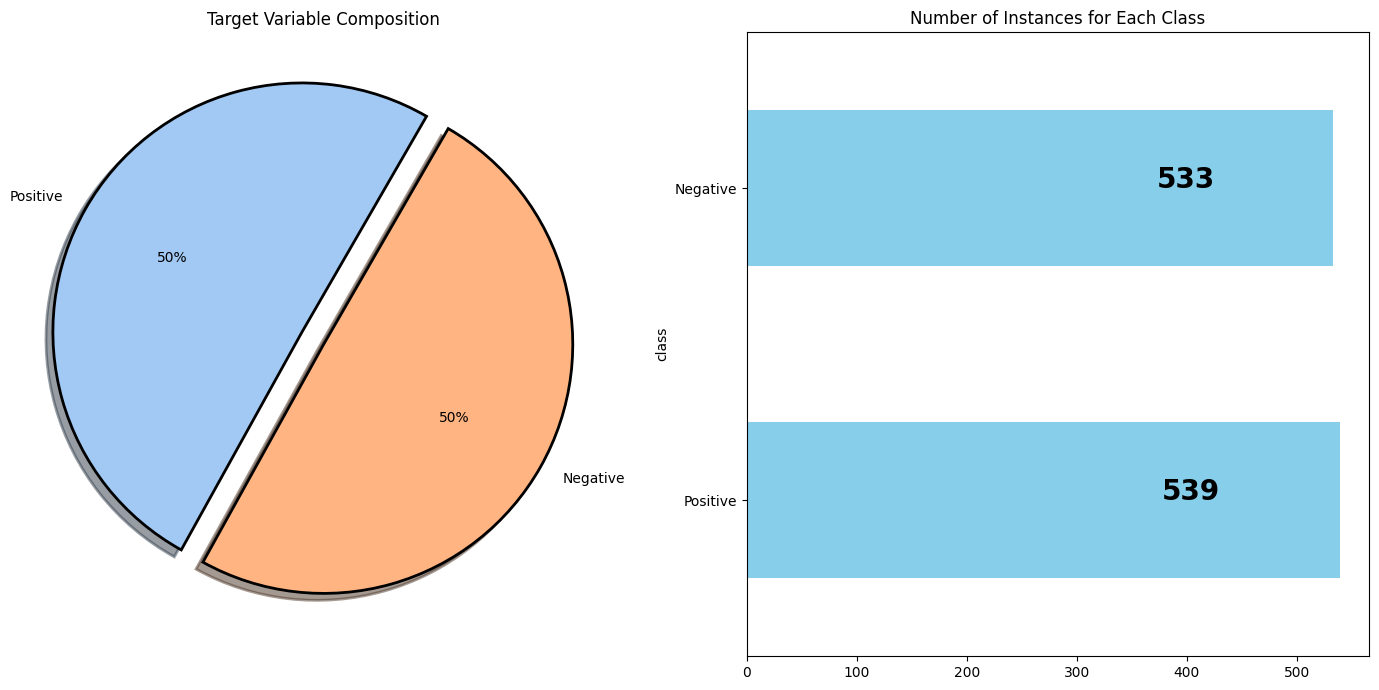

In [73]:


# Create a new figure and axes for the subplots
figure, subplot_axes = plt.subplots(1, 2, figsize=(14,7))

# Compute the counts of each class
class_counts = dataFrame['class'].value_counts()

# Define the color palette and explode parameters
color_palette_pie = sns.color_palette("pastel", 7)
explode_params = [0.1, 0]

# Create a pie chart on the first subplot with the new color palette
subplot_axes[0].pie(class_counts, autopct='%1.0f%%', startangle=60, labels=["Positive","Negative"], colors=color_palette_pie, explode=explode_params, shadow=True, wedgeprops={"linewidth":2,"edgecolor":"k"})
subplot_axes[0].set_title("Target Variable Composition")

# Create a bar plot on the second subplot with a different color
class_counts.plot(kind='barh', ax=subplot_axes[1], color='skyblue',legend=False)
for idx, val in enumerate(class_counts.values):
    subplot_axes[1].text(val * 0.7, idx, str(val), weight='bold', fontsize=20)
subplot_axes[1].set_title("Number of Instances for Each Class")

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

class,Negative,Positive
Gender,,
Female,47.090000,49.910000
Male,52.910000,50.090000


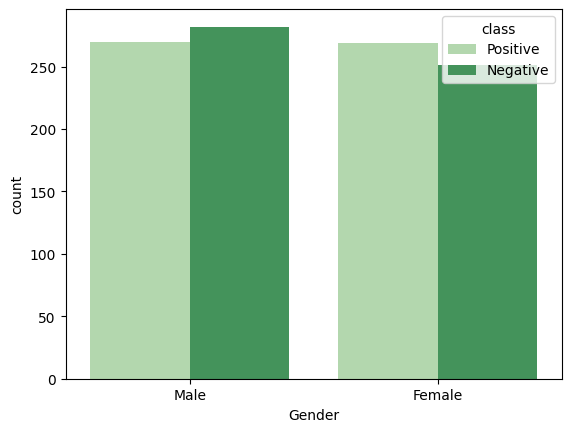

In [74]:


# Visualising the distribution of Gender
gender_plot = sns.countplot(x=dataFrame['Gender'], hue=dataFrame['class'], palette='Greens')

# Defining the criteria for the cross-tabulation
cross_tab_criteria = ['Gender', 'class']

# Creating a color map
color_map = sns.light_palette("blue", as_cmap=True)

# Creating a cross-tabulation and normalizing the values by column
cross_tab = pd.crosstab(dataFrame[cross_tab_criteria[0]], dataFrame[cross_tab_criteria[1]], normalize='columns')

# Converting the proportions to percentages and rounding to 2 decimal places
cross_tab_percentages = cross_tab.mul(100).round(2)

# Applying a gradient coloring to the table
styled_cross_tab = cross_tab_percentages.style.background_gradient(cmap=color_map)

styled_cross_tab

This Python code is using the seaborn and pandas libraries to visualize and analyze the distribution of a 'Gender' feature in relation to a 'class' feature in a dataset.

Here's a step-by-step explanation:

1. `sns.countplot(x=df['Gender'], hue=df['class'], palette='Greens')`: This line is creating a countplot, which is a type of bar plot. It's showing the count of observations in each category of 'Gender' (which is set as the x-axis), separated by different colors based on the 'class' feature.

2. `cross_tab_criteria = ['Gender', 'class']`: This line is defining the criteria for the cross-tabulation that will be created later. The cross-tabulation will be between 'Gender' and 'class'.

3. `color_map = sns.light_palette("blue", as_cmap=True)`: This line is creating a color map using seaborn's `light_palette` function. The color map will be used to apply a gradient coloring to the cross-tabulation.

4. `cross_tab = pd.crosstab(df[cross_tab_criteria[0]], df[cross_tab_criteria[1]], normalize='columns')`: This line is creating a cross-tabulation (a table showing the frequency distribution of two variables) between 'Gender' and 'class'. The `normalize='columns'` argument is used to normalize the values by column, so the values will be proportions instead of counts.

5. `cross_tab_percentages = cross_tab.mul(100).round(2)`: This line is converting the proportions in the cross-tabulation to percentages and rounding them to 2 decimal places.

6. `styled_cross_tab = cross_tab_percentages.style.background_gradient(cmap=color_map)`: This line is applying a gradient coloring to the cross-tabulation using the color map created earlier. The gradient coloring helps to visually emphasize the differences in values.

7. `styled_cross_tab`: This line is displaying the styled cross-tabulation.

In [75]:
#Analysis based on Gender
dataFrame.groupby("Gender")["class"].value_counts().unstack()

class,Negative,Positive
Gender,,
Female,251,269
Male,282,270


Females in the dataset turned out to be more more positive

class,Negative,Positive
Polyuria,,
No,91.740000,25.230000
Yes,8.260000,74.770000


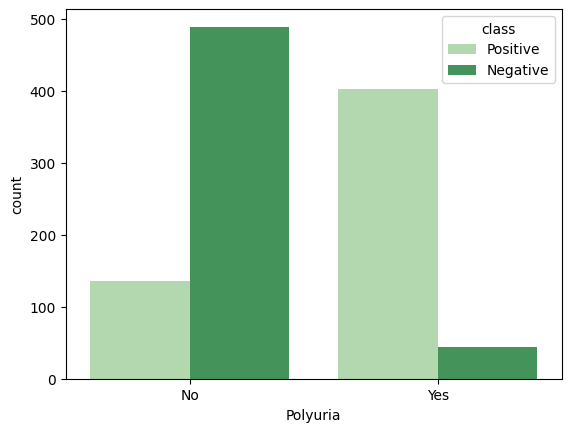

In [76]:
# Visualizing the distribution of Polyuria
polyuria_plot = sns.countplot(x=dataFrame['Polyuria'], hue=dataFrame['class'], palette='Greens')

# Defining the criteria for the cross-tabulation
cross_tab_criteria = ['Polyuria', 'class']

# Creating a color map
color_map = sns.light_palette("blue", as_cmap=True)

# Creating a cross-tabulation and normalizing the values by column
cross_tab = pd.crosstab(dataFrame[cross_tab_criteria[0]], dataFrame[cross_tab_criteria[1]], normalize='columns')

# Converting the proportions to percentages and rounding to 2 decimal places
cross_tab_percentages = cross_tab.mul(100).round(2)

# Applying a gradient coloring to the table
styled_cross_tab = cross_tab_percentages.style.background_gradient(cmap=color_map)

styled_cross_tab

In [77]:
#Analysis based on Polyuria
dataFrame.groupby("Polyuria")["class"].value_counts().unstack()

class,Negative,Positive
Polyuria,,
No,489,136
Yes,44,403


class,Negative,Positive
Polydipsia,,
No,95.120000,29.500000
Yes,4.880000,70.500000


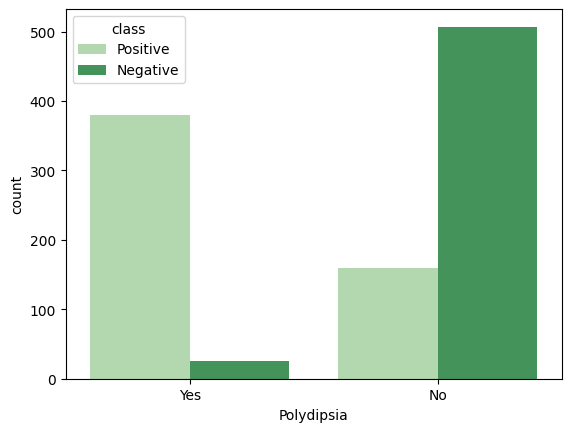

In [78]:


# Visualizing the distribution of Polydipsia
polydipsia_plot = sns.countplot(x=dataFrame['Polydipsia'], hue=dataFrame['class'], palette='Greens')

# Defining the criteria for the cross-tabulation
cross_tab_criteria = ['Polydipsia', 'class']

# Creating a color map
color_map = sns.light_palette("blue", as_cmap=True)

# Creating a cross-tabulation and normalizing the values by column
cross_tab = pd.crosstab(dataFrame[cross_tab_criteria[0]], dataFrame[cross_tab_criteria[1]], normalize='columns')

# Converting the proportions to percentages and rounding to 2 decimal places
cross_tab_percentages = cross_tab.mul(100).round(2)

# Applying a gradient coloring to the table
styled_cross_tab = cross_tab_percentages.style.background_gradient(cmap=color_map)

styled_cross_tab

In [79]:
#Analysis based on Polydipsia
dataFrame.groupby("Polydipsia")["class"].value_counts().unstack()

class,Negative,Positive
Polydipsia,,
No,507,159
Yes,26,380


class,Negative,Positive
sudden weight loss,,
No,83.490000,41.000000
Yes,16.510000,59.000000


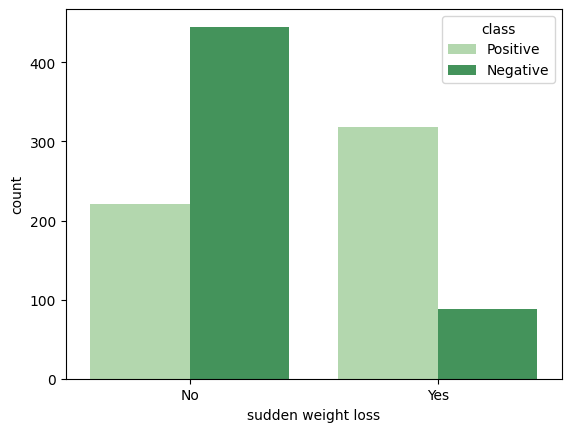

In [80]:


# Visualizing the distribution of sudden weight loss
sudden_weight_loss_plot = sns.countplot(x=dataFrame['sudden weight loss'], hue=dataFrame['class'], palette='Greens')

# Defining the criteria for the cross-tabulation
cross_tab_criteria = ['sudden weight loss', 'class']

# Creating a color map
color_map = sns.light_palette("blue", as_cmap=True)

# Creating a cross-tabulation and normalizing the values by column
cross_tab = pd.crosstab(dataFrame[cross_tab_criteria[0]], dataFrame[cross_tab_criteria[1]], normalize='columns')

# Converting the proportions to percentages and rounding to 2 decimal places
cross_tab_percentages = cross_tab.mul(100).round(2)

# Applying a gradient coloring to the table
styled_cross_tab = cross_tab_percentages.style.background_gradient(cmap=color_map)

styled_cross_tab

In [81]:
#Analysis based on sudden weight loss
dataFrame.groupby("sudden weight loss")["class"].value_counts().unstack()

class,Negative,Positive
sudden weight loss,,
No,445,221
Yes,88,318


class,Negative,Positive
weakness,,
No,54.410000,28.940000
Yes,45.590000,71.060000


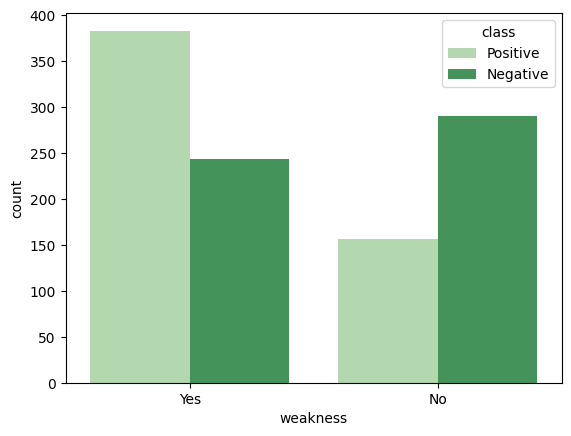

In [82]:


# Visualizing the distribution of weakness
weakness_plot = sns.countplot(x=dataFrame['weakness'], hue=dataFrame['class'], palette='Greens')

# Defining the criteria for the cross-tabulation
cross_tab_criteria = ['weakness', 'class']

# Creating a color map
color_map = sns.light_palette("blue", as_cmap=True)

# Creating a cross-tabulation and normalizing the values by column
cross_tab = pd.crosstab(dataFrame[cross_tab_criteria[0]], dataFrame[cross_tab_criteria[1]], normalize='columns')

# Converting the proportions to percentages and rounding to 2 decimal places
cross_tab_percentages = cross_tab.mul(100).round(2)

# Applying a gradient coloring to the table
styled_cross_tab = cross_tab_percentages.style.background_gradient(cmap=color_map)

styled_cross_tab

In [83]:
#Analysis based on  weakness
dataFrame.groupby("weakness")["class"].value_counts().unstack()

class,Negative,Positive
weakness,,
No,290,156
Yes,243,383


class,Negative,Positive
Polyphagia,,
No,74.670000,41.740000
Yes,25.330000,58.260000


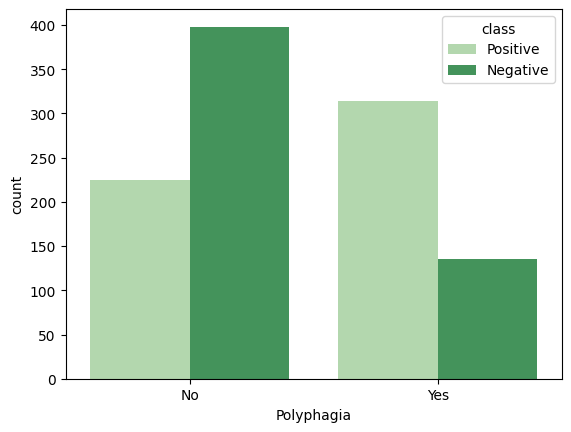

In [84]:


# Visualizing the distribution of Polyphagia
polyphagia_plot = sns.countplot(x=dataFrame['Polyphagia'], hue=dataFrame['class'], palette='Greens')

# Defining the criteria for the cross-tabulation
cross_tab_criteria = ['Polyphagia', 'class']

# Creating a color map
color_map = sns.light_palette("blue", as_cmap=True)

# Creating a cross-tabulation and normalizing the values by column
cross_tab = pd.crosstab(dataFrame[cross_tab_criteria[0]], dataFrame[cross_tab_criteria[1]], normalize='columns')

# Converting the proportions to percentages and rounding to 2 decimal places
cross_tab_percentages = cross_tab.mul(100).round(2)

# Applying a gradient coloring to the table
styled_cross_tab = cross_tab_percentages.style.background_gradient(cmap=color_map)

styled_cross_tab

In [85]:
#Analysis based on Polyphagia
dataFrame.groupby("Polyphagia")["class"].value_counts().unstack()

class,Negative,Positive
Polyphagia,,
No,398,225
Yes,135,314


class,Negative,Positive
Genital thrush,,
No,86.120000,74.580000
Yes,13.880000,25.420000


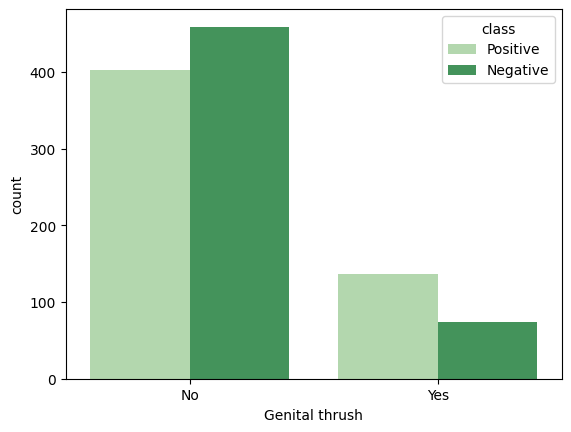

In [86]:


# Visualizing the distribution of Genital thrush
genital_thrush_plot = sns.countplot(x=dataFrame['Genital thrush'], hue=dataFrame['class'], palette='Greens')

# Defining the criteria for the cross-tabulation
cross_tab_criteria = ['Genital thrush', 'class']

# Creating a color map
color_map = sns.light_palette("blue", as_cmap=True)

# Creating a cross-tabulation and normalizing the values by column
cross_tab = pd.crosstab(dataFrame[cross_tab_criteria[0]], dataFrame[cross_tab_criteria[1]], normalize='columns')

# Converting the proportions to percentages and rounding to 2 decimal places
cross_tab_percentages = cross_tab.mul(100).round(2)

# Applying a gradient coloring to the table
styled_cross_tab = cross_tab_percentages.style.background_gradient(cmap=color_map)

styled_cross_tab

In [87]:
#Analysis based on Genital thrush
dataFrame.groupby("Genital thrush")["class"].value_counts().unstack()

class,Negative,Positive
Genital thrush,,
No,459,402
Yes,74,137


class,Negative,Positive
visual blurring,,
No,74.110000,44.340000
Yes,25.890000,55.660000


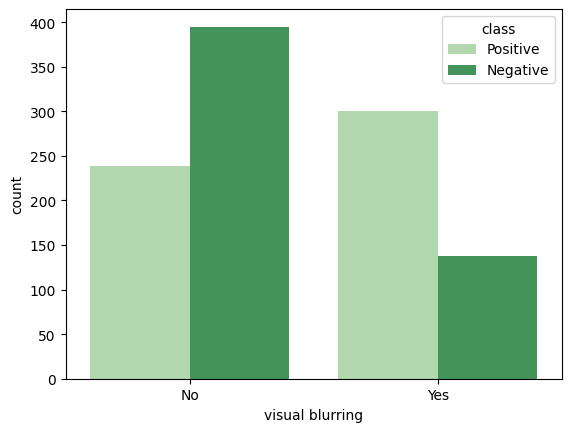

In [88]:


# Visualizing the distribution of visual blurring
visual_blurring_plot = sns.countplot(x=dataFrame['visual blurring'], hue=dataFrame['class'], palette='Greens')

# Defining the criteria for the cross-tabulation
cross_tab_criteria = ['visual blurring', 'class']

# Creating a color map
color_map = sns.light_palette("blue", as_cmap=True)

# Creating a cross-tabulation and normalizing the values by column
cross_tab = pd.crosstab(dataFrame[cross_tab_criteria[0]], dataFrame[cross_tab_criteria[1]], normalize='columns')

# Converting the proportions to percentages and rounding to 2 decimal places
cross_tab_percentages = cross_tab.mul(100).round(2)

# Applying a gradient coloring to the table
styled_cross_tab = cross_tab_percentages.style.background_gradient(cmap=color_map)

styled_cross_tab

In [89]:
#Analysis based on visual blurring
dataFrame.groupby("visual blurring")["class"].value_counts().unstack()

class,Negative,Positive
visual blurring,,
No,395,239
Yes,138,300


class,Negative,Positive
Itching,,
No,48.970000,53.430000
Yes,51.030000,46.570000


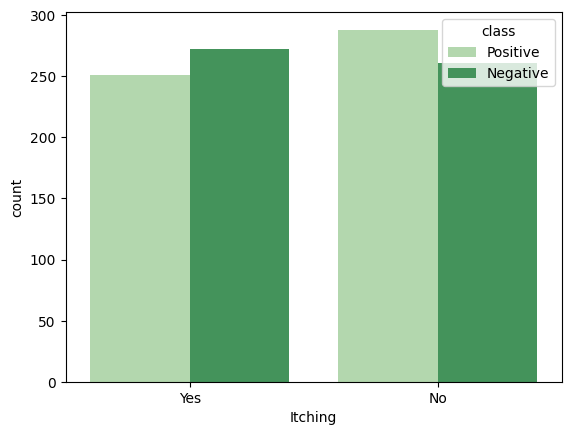

In [90]:


# Visualizing the distribution of Itching
itching_plot = sns.countplot(x=dataFrame['Itching'], hue=dataFrame['class'], palette='Greens')

# Defining the criteria for the cross-tabulation
cross_tab_criteria = ['Itching', 'class']

# Creating a color map
color_map = sns.light_palette("blue", as_cmap=True)

# Creating a cross-tabulation and normalizing the values by column
cross_tab = pd.crosstab(dataFrame[cross_tab_criteria[0]], dataFrame[cross_tab_criteria[1]], normalize='columns')

# Converting the proportions to percentages and rounding to 2 decimal places
cross_tab_percentages = cross_tab.mul(100).round(2)

# Applying a gradient coloring to the table
styled_cross_tab = cross_tab_percentages.style.background_gradient(cmap=color_map)

styled_cross_tab

In [91]:
#Analysis based on Itching
dataFrame.groupby("Itching")["class"].value_counts().unstack()

class,Negative,Positive
Itching,,
No,261,288
Yes,272,251


class,Negative,Positive
Irritability,,
No,92.120000,64.190000
Yes,7.880000,35.810000


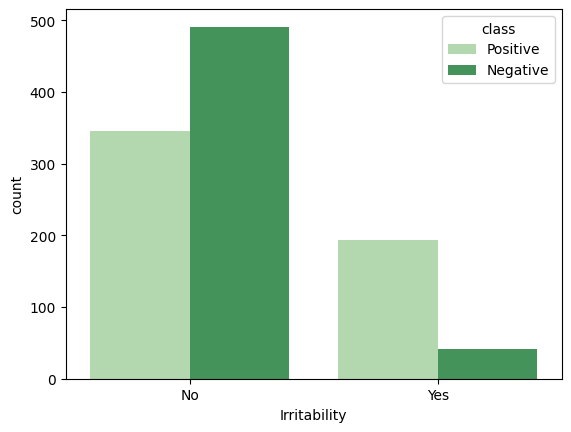

In [92]:


# Visualizing the distribution of Irritability
irritability_plot = sns.countplot(x=dataFrame['Irritability'], hue=dataFrame['class'], palette='Greens')

# Defining the criteria for the cross-tabulation
cross_tab_criteria = ['Irritability', 'class']

# Creating a color map
color_map = sns.light_palette("blue", as_cmap=True)

# Creating a cross-tabulation and normalizing the values by column
cross_tab = pd.crosstab(dataFrame[cross_tab_criteria[0]], dataFrame[cross_tab_criteria[1]], normalize='columns')

# Converting the proportions to percentages and rounding to 2 decimal places
cross_tab_percentages = cross_tab.mul(100).round(2)

# Applying a gradient coloring to the table
styled_cross_tab = cross_tab_percentages.style.background_gradient(cmap=color_map)

styled_cross_tab

In [93]:
#Analysis based on Irritability
dataFrame.groupby("Irritability")["class"].value_counts().unstack()

class,Negative,Positive
Irritability,,
No,491,346
Yes,42,193


class,Negative,Positive
delayed healing,,
No,56.470000,52.880000
Yes,43.530000,47.120000


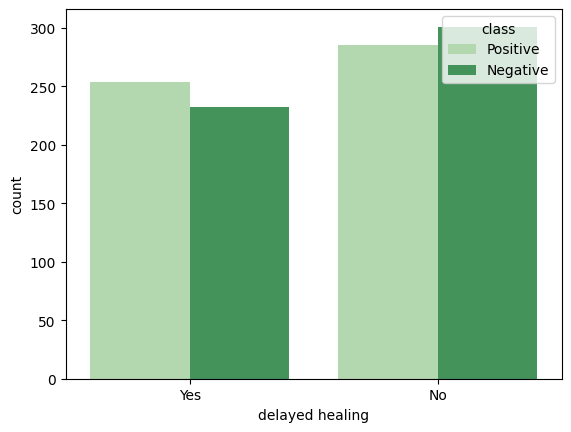

In [94]:


# Visualizing the distribution of delayed healing
delayed_healing_plot = sns.countplot(x=dataFrame['delayed healing'], hue=dataFrame['class'], palette='Greens')

# Defining the criteria for the cross-tabulation
cross_tab_criteria = ['delayed healing', 'class']

# Creating a color map
color_map = sns.light_palette("blue", as_cmap=True)

# Creating a cross-tabulation and normalizing the values by column
cross_tab = pd.crosstab(dataFrame[cross_tab_criteria[0]], dataFrame[cross_tab_criteria[1]], normalize='columns')

# Converting the proportions to percentages and rounding to 2 decimal places
cross_tab_percentages = cross_tab.mul(100).round(2)

# Applying a gradient coloring to the table
styled_cross_tab = cross_tab_percentages.style.background_gradient(cmap=color_map)

styled_cross_tab

In [95]:
#Analysis based on delayed healing
dataFrame.groupby("delayed healing")["class"].value_counts().unstack()

class,Negative,Positive
delayed healing,,
No,301,285
Yes,232,254


class,Negative,Positive
partial paresis,,
No,84.240000,39.520000
Yes,15.760000,60.480000


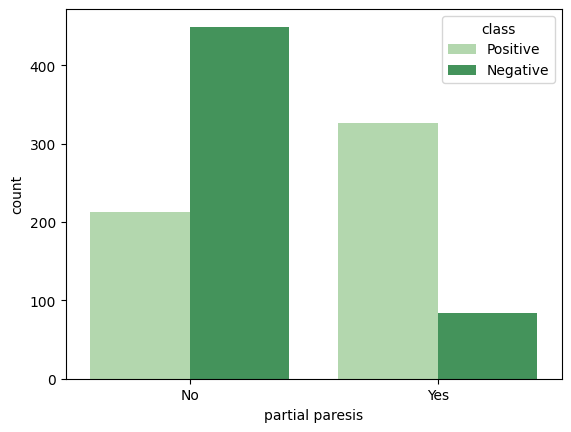

In [96]:


# Visualizing the distribution of partial paresis
partial_paresis_plot = sns.countplot(x=dataFrame['partial paresis'], hue=dataFrame['class'], palette='Greens')

# Defining the criteria for the cross-tabulation
cross_tab_criteria = ['partial paresis', 'class']

# Creating a color map
color_map = sns.light_palette("blue", as_cmap=True)

# Creating a cross-tabulation and normalizing the values by column
cross_tab = pd.crosstab(dataFrame[cross_tab_criteria[0]], dataFrame[cross_tab_criteria[1]], normalize='columns')

# Converting the proportions to percentages and rounding to 2 decimal places
cross_tab_percentages = cross_tab.mul(100).round(2)

# Applying a gradient coloring to the table
styled_cross_tab = cross_tab_percentages.style.background_gradient(cmap=color_map)

styled_cross_tab

In [97]:
#Analysis based on partial paresis
dataFrame.groupby("partial paresis")["class"].value_counts().unstack()

class,Negative,Positive
partial paresis,,
No,449,213
Yes,84,326


class,Negative,Positive
muscle stiffness,,
No,70.540000,57.880000
Yes,29.460000,42.120000


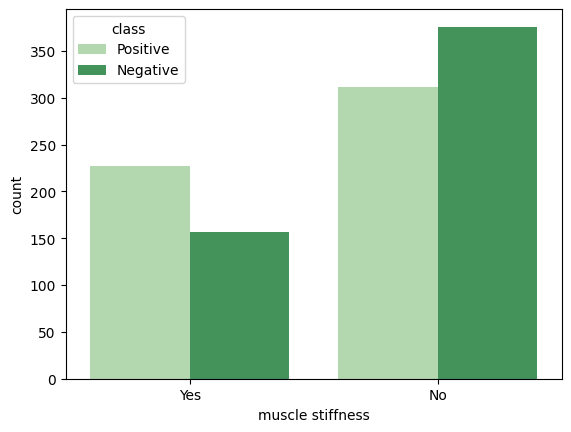

In [98]:


# Visualizing the distribution of muscle stiffness
muscle_stiffness_plot = sns.countplot(x=dataFrame['muscle stiffness'], hue=dataFrame['class'], palette='Greens')

# Defining the criteria for the cross-tabulation
cross_tab_criteria = ['muscle stiffness', 'class']

# Creating a color map
color_map = sns.light_palette("blue", as_cmap=True)

# Creating a cross-tabulation and normalizing the values by column
cross_tab = pd.crosstab(dataFrame[cross_tab_criteria[0]], dataFrame[cross_tab_criteria[1]], normalize='columns')

# Converting the proportions to percentages and rounding to 2 decimal places
cross_tab_percentages = cross_tab.mul(100).round(2)

# Applying a gradient coloring to the table
styled_cross_tab = cross_tab_percentages.style.background_gradient(cmap=color_map)

styled_cross_tab

In [99]:
#Analysis based on muscle stiffness
dataFrame.groupby("muscle stiffness")["class"].value_counts().unstack()

class,Negative,Positive
muscle stiffness,,
No,376,312
Yes,157,227


class,Negative,Positive
Alopecia,,
No,48.970000,74.030000
Yes,51.030000,25.970000


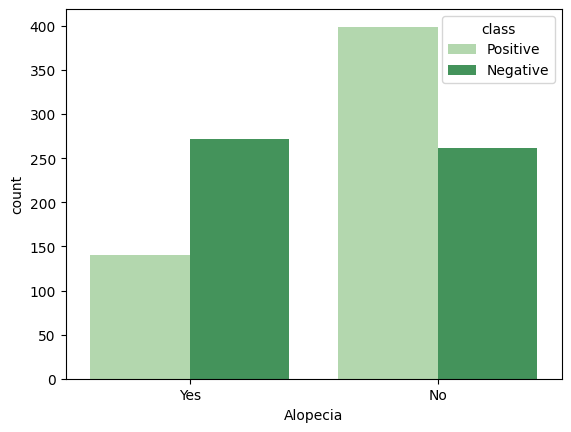

In [100]:


# Visualizing the distribution of Alopecia
alopecia_plot = sns.countplot(x=dataFrame['Alopecia'], hue=dataFrame['class'], palette='Greens')

# Defining the criteria for the cross-tabulation
cross_tab_criteria = ['Alopecia', 'class']

# Creating a color map
color_map = sns.light_palette("blue", as_cmap=True)

# Creating a cross-tabulation and normalizing the values by column
cross_tab = pd.crosstab(dataFrame[cross_tab_criteria[0]], dataFrame[cross_tab_criteria[1]], normalize='columns')

# Converting the proportions to percentages and rounding to 2 decimal places
cross_tab_percentages = cross_tab.mul(100).round(2)

# Applying a gradient coloring to the table
styled_cross_tab = cross_tab_percentages.style.background_gradient(cmap=color_map)

styled_cross_tab

In [101]:
#Analysis based on Alopecia
dataFrame.groupby("Alopecia")["class"].value_counts().unstack()

class,Negative,Positive
Alopecia,,
No,261,399
Yes,272,140


class,Negative,Positive
Obesity,,
No,86.120000,80.520000
Yes,13.880000,19.480000


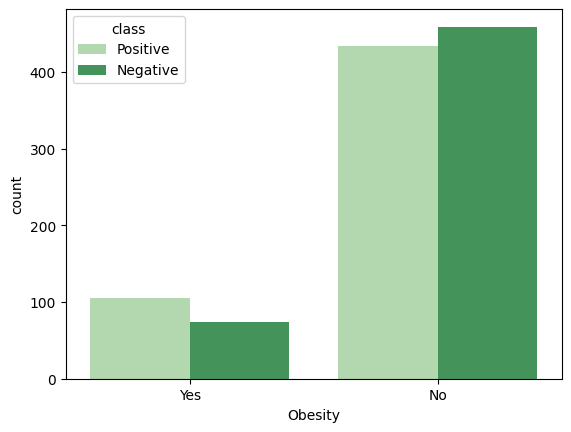

In [102]:


# Visualizing the distribution of Obesity
obesity_plot = sns.countplot(x=dataFrame['Obesity'], hue=dataFrame['class'], palette='Greens')

# Defining the criteria for the cross-tabulation
cross_tab_criteria = ['Obesity', 'class']

# Creating a color map
color_map = sns.light_palette("blue", as_cmap=True)

# Creating a cross-tabulation and normalizing the values by column
cross_tab = pd.crosstab(dataFrame[cross_tab_criteria[0]], dataFrame[cross_tab_criteria[1]], normalize='columns')

# Converting the proportions to percentages and rounding to 2 decimal places
cross_tab_percentages = cross_tab.mul(100).round(2)

# Applying a gradient coloring to the table
styled_cross_tab = cross_tab_percentages.style.background_gradient(cmap=color_map)

styled_cross_tab

In [103]:
#Analysis based on Obesity
dataFrame.groupby("Obesity")["class"].value_counts().unstack()

class,Negative,Positive
Obesity,,
No,459,434
Yes,74,105


### Occurences of Symptoms in patients

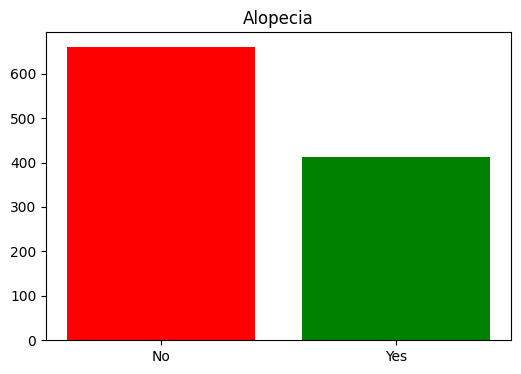

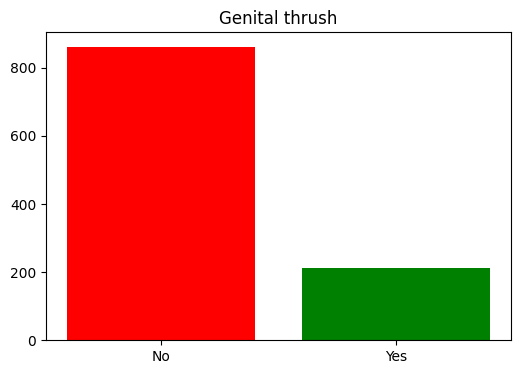

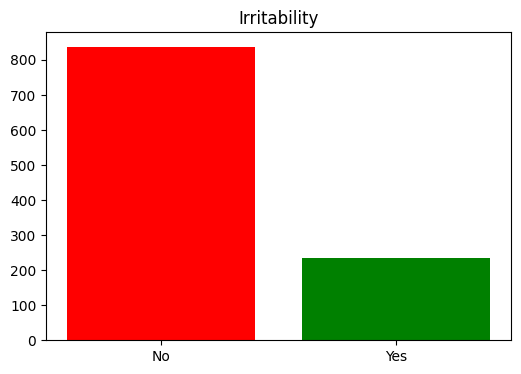

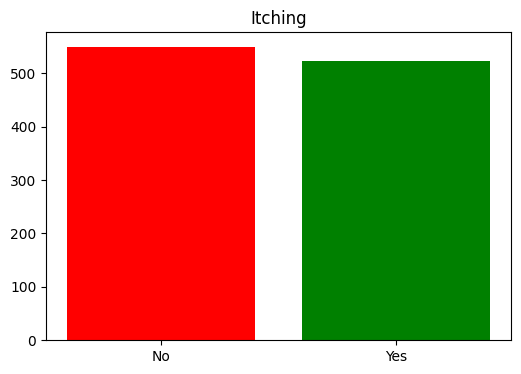

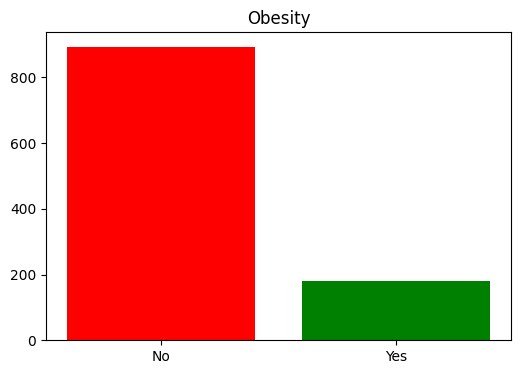

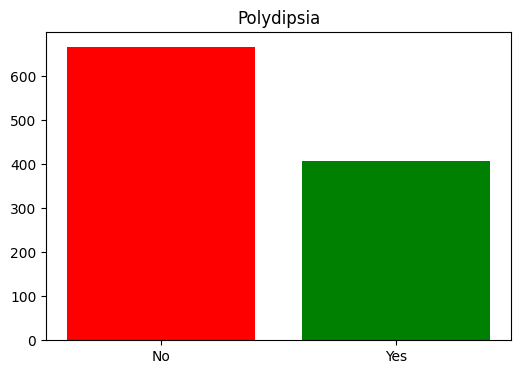

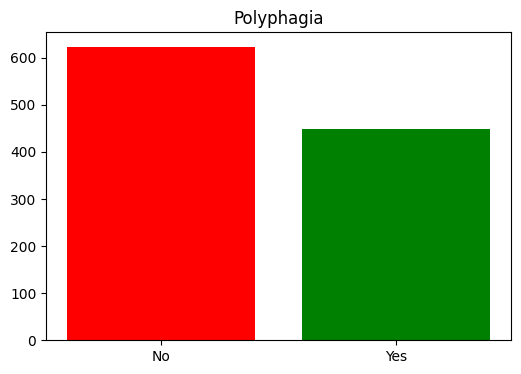

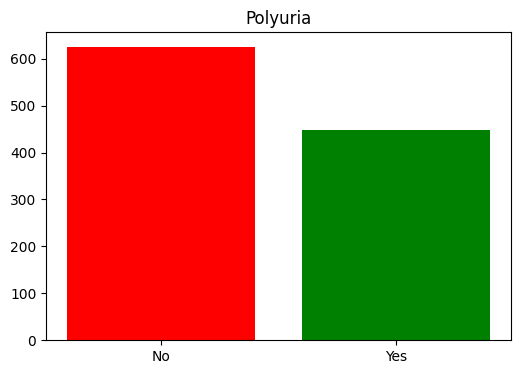

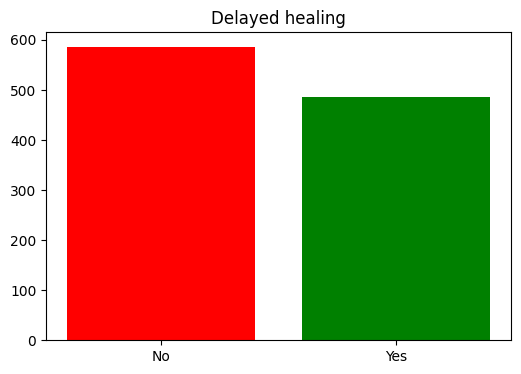

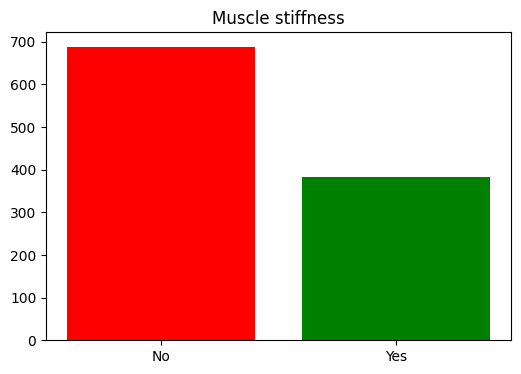

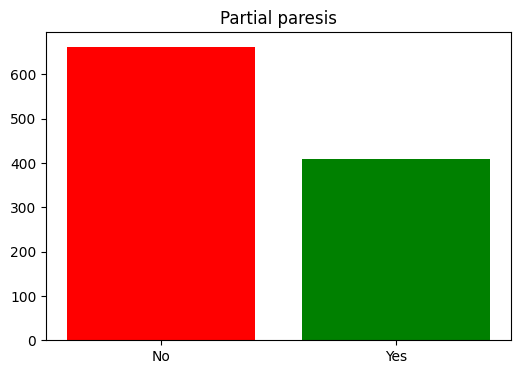

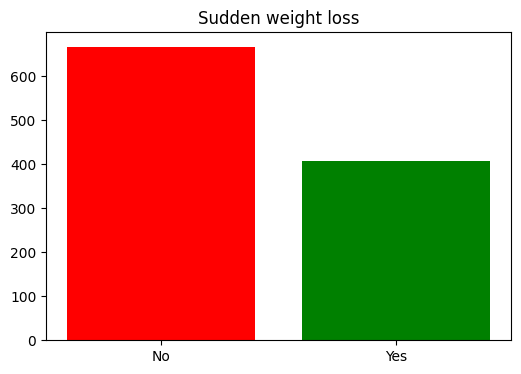

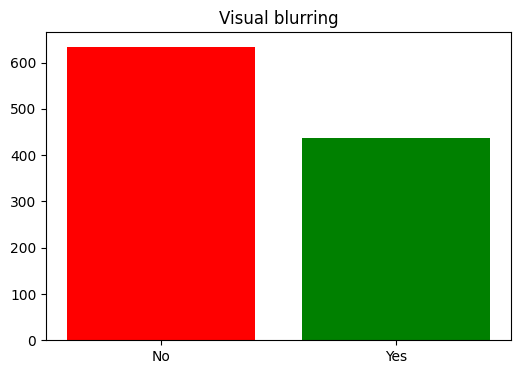

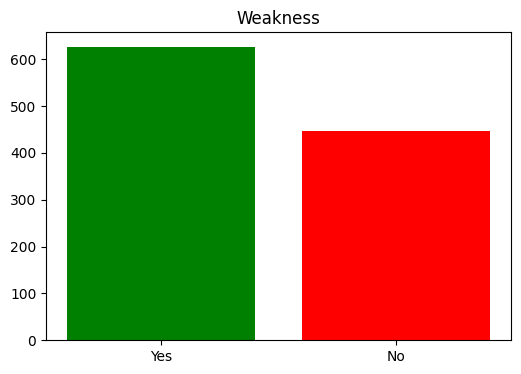

In [104]:

# Define a function to create a bar plot
def plotBar(value, title):
    # Set the figure size
    plt.figure(figsize=(6,4))
    # Get the counts of each unique value in the input series
    value_counts = value.value_counts()
    # Create a list of colors, 'blue' for 'Yes' and 'red' for other values
    colors = ['green' if v == 'Yes' else 'red' for v in value_counts.index]
    # Create a bar plot with the unique values as the x-axis and their counts as the y-axis
    plt.bar(value_counts.index, value_counts.values, color=colors)
    # Set the title of the plot
    plt.title(title)
    # Display the plot
    plt.show()

# Create a new dataframe that includes all columns from the original dataframe except 'Age', 'class', and 'Gender'
df_symptoms = dataFrame[dataFrame.columns.difference(["Age", "class", "Gender"])]

# For each column in the new dataframe
for column in df_symptoms.columns:
    # Call the plotBar function with the column data and the capitalized column name as the title
    plotBar(df_symptoms[column], column.capitalize())


  

In [133]:


# Filter the DataFrame based on the integer value in 'class' column
positive_diabetes = dataFrame[dataFrame["class"] == 1].copy()
positive_diabetes.drop(['Age', 'Gender', 'class'], axis=1, inplace=True)

# Map binary values to 'Yes' and 'No'
positive_diabetes = positive_diabetes.replace({1: 'Yes', 0: 'No'})

# Check and transform the data
symptom_counts = positive_diabetes.apply(pd.Series.value_counts).transpose()

# Ensure 'Yes' and 'No' columns exist
if 'Yes' in symptom_counts.columns and 'No' in symptom_counts.columns:
    symptom_counts['Symptom_Present_Percentage'] = symptom_counts['Yes'] / (symptom_counts['Yes'] + symptom_counts['No']) * 100
    symptom_counts['Symptom_Absent_Percentage'] = symptom_counts['No'] / (symptom_counts['Yes'] + symptom_counts['No']) * 100
    symptom_counts.drop(['Yes', 'No'], inplace=True, axis=1)

    print('\033[1m' + '\n\t People who were tested positive for Diabetes')
    print('**********************************************************')
    sorted_symptoms = symptom_counts.sort_values(by='Symptom_Present_Percentage', ascending=False)
    print(sorted_symptoms)
else:
    print("Error: 'Yes' and/or 'No' columns not found in symptom_counts DataFrame")



	 People who were tested positive for Diabetes
**********************************************************
                    Symptom_Present_Percentage  Symptom_Absent_Percentage
Polyuria                             74.768089                  25.231911
weakness                             71.057514                  28.942486
Polydipsia                           70.500928                  29.499072
partial paresis                      60.482375                  39.517625
sudden weight loss                   58.998145                  41.001855
Polyphagia                           58.256030                  41.743970
visual blurring                      55.658627                  44.341373
delayed healing                      47.124304                  52.875696
Itching                              46.567718                  53.432282
muscle stiffness                     42.115028                  57.884972
Irritability                         35.807050                  64.192950
Alope

Polyuria and Polydipsia are the major symptoms if the patient has diabetes.

Polyuria is a condition where the body urinates more than usual and passes excessive or abnormally large amounts of urine each time you urinate. Polyuria is defined as the frequent passage of large volumes of urine – more than 3 litres a day compared to the normal daily urine output in adults of about 1 to 2 litres.

Polydipsia is a medical name for the feeling of extreme thirstiness. Polydipsia is often linked to urinary conditions that cause you to urinate a lot. This can make your body feel a constant need to replace the fluids lost in urination. It can also be caused by physical processes that cause you to lose a lot of fluid.

### Data Pre-Processing

In [106]:
# Changing 'Positive' to 1 and 'Negative' to 0
dataFrame['class'] = dataFrame['class'].replace({'Positive': 1, 'Negative': 0})
dataFrame['class'].head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [107]:
# Splitting the DataFrame into features and target
features = dataFrame.drop(['class'], axis=1)  # All columns except 'class' are considered as features
target = dataFrame['class']  # 'class' column is the target

In [108]:
# Identify and store columns in the features DataFrame that are of type 'object'
object_columns = features.columns[features.dtypes == 'object']
print(object_columns)

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')


In [109]:
# Print the information of the DataFrame
print (features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 1072 non-null   int64 
 1   Gender              1072 non-null   object
 2   Polyuria            1072 non-null   object
 3   Polydipsia          1072 non-null   object
 4   sudden weight loss  1072 non-null   object
 5   weakness            1072 non-null   object
 6   Polyphagia          1072 non-null   object
 7   Genital thrush      1072 non-null   object
 8   visual blurring     1072 non-null   object
 9   Itching             1072 non-null   object
 10  Irritability        1072 non-null   object
 11  delayed healing     1072 non-null   object
 12  partial paresis     1072 non-null   object
 13  muscle stiffness    1072 non-null   object
 14  Alopecia            1072 non-null   object
 15  Obesity             1072 non-null   object
dtypes: int64(1), object(15)


In [110]:


# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate over each feature in the object list
for column in object_columns:
    # Convert the column to string type and perform label encoding
    features[column] = label_encoder.fit_transform(features[column].astype(str))

# Print the information of the DataFrame
print(features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 1072 non-null   int64
 1   Gender              1072 non-null   int64
 2   Polyuria            1072 non-null   int64
 3   Polydipsia          1072 non-null   int64
 4   sudden weight loss  1072 non-null   int64
 5   weakness            1072 non-null   int64
 6   Polyphagia          1072 non-null   int64
 7   Genital thrush      1072 non-null   int64
 8   visual blurring     1072 non-null   int64
 9   Itching             1072 non-null   int64
 10  Irritability        1072 non-null   int64
 11  delayed healing     1072 non-null   int64
 12  partial paresis     1072 non-null   int64
 13  muscle stiffness    1072 non-null   int64
 14  Alopecia            1072 non-null   int64
 15  Obesity             1072 non-null   int64
dtypes: int64(16)
memory usage: 134.1 KB
None


In [111]:
features.head(50)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
5,55,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1
6,57,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0
7,66,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0
8,67,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1
9,70,1,0,1,1,1,1,0,1,1,1,0,0,0,1,0


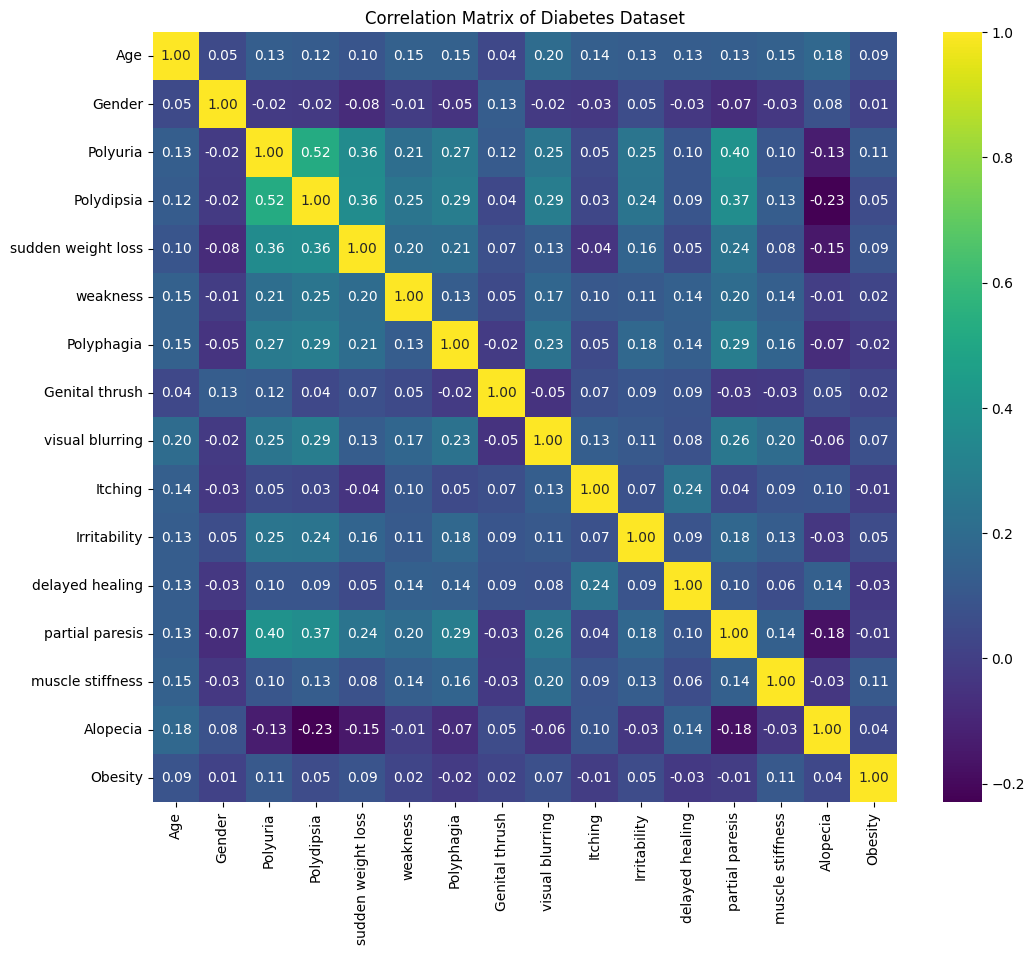

In [112]:


# Compute the correlation matrix
correlation_matrix = features.corr()

# Create a new figure for the plot
fig, ax = plt.subplots(figsize=(12, 10))

# Create a heatmap
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis', ax=ax)

# Set the title of the heatmap
heatmap.set_title("Correlation Matrix of Diabetes Dataset")

# Display the plot
plt.show()

The heatmap of the correlation matrix provides insights into the relationships between different features in the dataset, including the relationship between each feature and the target variable (class). Here are some observations:

Linear vs. Non-Linear Relationships:

The correlation coefficients range between -1 and 1, where values close to -1 or 1 indicate a strong linear relationship, and values close to 0 indicate a weak or no linear relationship.
Some features show moderate to strong correlations with the target variable (e.g., Polyuria, Polydipsia), suggesting potential linear relationships.
However, the absence of a strong linear correlation (close to -1 or 1) for many features suggests that the relationships in the data may not be purely linear.
Inter-Feature Correlations:

There are some moderate correlations between certain features. This inter-feature correlation is important as it may affect models that assume independence between features, like Naive Bayes.
Non-Linear Models:

Given that not all relationships are strongly linear, models that can capture non-linear relationships (like Random Forest, Gradient Boosting Machines, or Neural Networks) might be more effective.
Model Testing:

To conclusively determine whether the dataset is linear or non-linear, it would be prudent to test both types of models. If models capable of capturing non-linear relationships (like tree-based models) significantly outperform linear models (like Logistic Regression), this would suggest the presence of non-linear relationships.
In conclusion, while there are some indications of linear relationships, the dataset likely contains a mix of linear and non-linear relationships. It would be advisable to experiment with a range of models to determine which best captures the underlying patterns in the data. ​

In [113]:

# Select the 10 best features based on the chi-squared (chi^2) statistical test for non-negative features
k_best_selector = SelectKBest(score_func=chi2, k=10)
fitted_selector = k_best_selector.fit(features, target)

# Create a DataFrame with the scores from the chi^2 test
score_data = pd.DataFrame(fitted_selector.scores_)

# Create a DataFrame with the column names
column_data = pd.DataFrame(features.columns)

# Concatenate the two DataFrames along the columns
feature_scores = pd.concat([column_data, score_data], axis=1)
feature_scores.columns = ['Feature', 'Score']
feature_scores

,Feature,Score
0,Age,42.692947
1,Gender,0.412503
2,Polyuria,284.328638
3,Polydipsia,304.719676
4,sudden weight loss,127.737660
5,weakness,29.763283
6,Polyphagia,69.373309
7,Genital thrush,18.112380
8,visual blurring,58.119917
9,Itching,1.094705


In [114]:
# Select the top 10 features based on chi-squared scores
top_chi2_features = feature_scores.nlargest(10, 'Score')
top_chi2_features

,Feature,Score
3,Polydipsia,304.719676
2,Polyuria,284.328638
12,partial paresis,140.147303
4,sudden weight loss,127.737660
10,Irritability,95.345582
6,Polyphagia,69.373309
8,visual blurring,58.119917
14,Alopecia,43.783152
0,Age,42.692947
5,weakness,29.763283


In [115]:
# Get the names of the top 10 features selected by the chi-squared test
top_chi2_features = fitted_selector.get_support(indices=True)
top_chi2_features = [column for column in features.columns[top_chi2_features]]
top_chi2_features

['Age',
 'Polyuria',
 'Polydipsia',
 'sudden weight loss',
 'weakness',
 'Polyphagia',
 'visual blurring',
 'Irritability',
 'partial paresis',
 'Alopecia']

<Axes: >

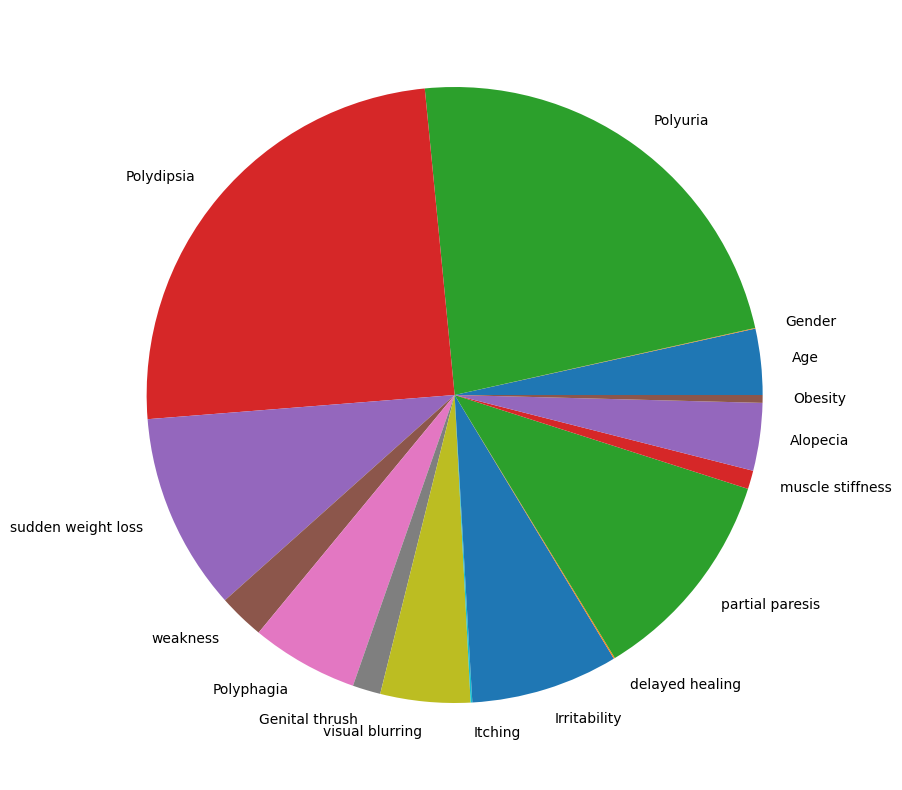

In [116]:

#pie chart of the features
featureview = pd.Series(fitted_selector.scores_, index=features.columns)
featureview.plot(kind='pie', figsize=(10, 10))  # Increase the size as needed


In [117]:
# Select features with a variance higher than 0.5 * (1 - 0.5)
#variance_selector = VarianceThreshold(threshold=(0.5 * (1 - 0.5)))
variance_selector = VarianceThreshold(threshold=0.24)
fitted_variance = variance_selector.fit(features)
print(fitted_variance)

# Create a DataFrame with the variances
variance_data = pd.DataFrame(fitted_variance.variances_)

# Create a DataFrame with the column names
column_data1 = pd.DataFrame(features.columns)

# Concatenate the two DataFrames along the columns
high_variance_features = pd.concat([variance_data, column_data1], axis=1)
high_variance_features.columns = ['Variance', 'Feature']

# Select the features with a variance higher than 0.2
top_variance_features = high_variance_features[high_variance_features['Variance'] > 0.24]
top_variance_features

VarianceThreshold(threshold=0.24)


,Variance,Feature
0,146.898578,Age
1,0.249777,Gender
2,0.243107,Polyuria
5,0.242952,weakness
6,0.243414,Polyphagia
8,0.241643,visual blurring
9,0.249853,Itching
11,0.247825,delayed healing


In [118]:
# Get the names of the features selected by the variance threshold
selected_features_indices = fitted_variance.get_support(indices=True)
selected_features = [column for column in features.columns[selected_features_indices]]
selected_features

['Age',
 'Gender',
 'Polyuria',
 'weakness',
 'Polyphagia',
 'visual blurring',
 'Itching',
 'delayed healing']

In [119]:
# Combine the selected features
final_selected_features = list(set(top_chi2_features).union(set(selected_features)))
print(final_selected_features)
# Select these features from the original dataset
X_final = features[final_selected_features]


#X_FS = X[['Polydipsia','sudden weight loss','partial paresis','Irritability','Polyphagia','Age','visual blurring']]

['Alopecia', 'sudden weight loss', 'weakness', 'Polyphagia', 'delayed healing', 'Polyuria', 'partial paresis', 'Itching', 'Polydipsia', 'Gender', 'visual blurring', 'Irritability', 'Age']


This Python code is performing feature selection and preprocessing on a dataset. Here's a step-by-step explanation:

1. A `SelectKBest` object is created to select the 10 best features based on the chi-squared (chi^2) statistical test. This test is used to determine if there is a significant association between two categorical variables.

2. The `SelectKBest` object is fitted to the data (`X`) and the target variable (`y`).

3. A DataFrame is created to store the scores from the chi^2 test, and another DataFrame is created to store the column names of the data.

4. The two DataFrames are concatenated along the columns to create a new DataFrame (`feature_scores`), which contains each feature and its corresponding chi^2 score.

5. The top 10 features based on chi^2 scores are selected.

6. A `VarianceThreshold` object is created to select features with a variance higher than 0.5 * (1 - 0.5). This object is fitted to the data (`X`).

7. The features selected by the variance threshold are identified.

8. The features selected by the chi^2 test and the variance threshold are combined to create a final list of selected features (`final_selected_features`).

9. These selected features are used to create a new DataFrame (`X_final`) from the original data.

10. The data is split into a training set (70% of the data) and a test set (30% of the data).

11. The 'Age' feature in both the training and test sets is scaled using a MinMaxScaler. This scales the feature to a range between 0 and 1.

Please note that the code seems to have some missing parts (like the creation of `variance_data` and `column_data1`), and it's trying to scale only the 'Age' feature, which might not exist in your dataset. You might need to adjust this part based on your actual dataset.

The code you provided is using two different feature selection methods: the chi-squared test and variance thresholding. 

The chi-squared test is used to determine if there is a significant association between two categorical variables. In this case, it's being used to select the top 10 features that are most strongly associated with the target variable.

Variance thresholding is used to remove features with a variance below a certain threshold. In this case, it's being used to remove features with a variance less than 0.24.

The line `final_selected_features = list(set(top_chi2_features).union(set(selected_features)))` is combining the features selected by both methods. The `set` function is used to create a set (a collection of unique elements) from the selected features, and the `union` function is used to combine these sets. This means that any feature that was selected by either the chi-squared test or variance thresholding will be included in the final set of features.

The line `X_final = features[final_selected_features]` is then selecting these features from the original dataset.

The reason for using multiple feature selection methods is to leverage the strengths of each method. The chi-squared test is good for identifying features that are strongly associated with the target variable, while variance thresholding is good for removing features that don't vary much (and therefore likely don't contain much useful information). By using both methods, you can select a set of features that both vary significantly and are strongly associated with the target variable.

### Splitting the dataset into training and testing sets

In [120]:
# Split the dataset into 70% training data and 30% testing data
X_train, X_test, y_train, y_test = train_test_split(X_final, target, test_size = 0.3, random_state=0)


### Data Normalization

In [121]:
# MinMax Scaling
minmax = MinMaxScaler()
X_train[['Age']] = minmax.fit_transform(X_train[['Age']])
X_test[['Age']] = minmax.transform(X_test[['Age']])

X_train.head()

,Alopecia,sudden weight loss,weakness,Polyphagia,delayed healing,Polyuria,partial paresis,Itching,Polydipsia,Gender,visual blurring,Irritability,Age
194,0,1,1,1,1,0,0,1,0,1,1,1,0.364865
362,0,0,0,0,0,0,1,0,0,0,1,0,0.162162
838,0,1,1,1,0,1,0,0,0,0,1,0,0.689189
729,1,0,1,0,1,0,0,1,0,1,0,0,0.648649
503,0,0,0,0,0,0,0,0,0,1,0,0,0.378378


This Python code is performing feature selection and preprocessing on a dataset. Here's a step-by-step explanation:

1. A `SelectKBest` object is created to select the 10 best features based on the chi-squared (chi^2) statistical test. This test is used to determine if there is a significant association between two categorical variables.

2. The `SelectKBest` object is fitted to the data (`X`) and the target variable (`y`).

3. A DataFrame is created to store the scores from the chi^2 test, and another DataFrame is created to store the column names of the data.

4. The two DataFrames are concatenated along the columns to create a new DataFrame (`feature_scores`), which contains each feature and its corresponding chi^2 score.

5. The top 10 features based on chi^2 scores are selected.

6. A `VarianceThreshold` object is created to select features with a variance higher than 0.5 * (1 - 0.5). This object is fitted to the data (`X`).

7. The features selected by the variance threshold are identified.

8. The features selected by the chi^2 test and the variance threshold are combined to create a final list of selected features (`final_selected_features`).

9. These selected features are used to create a new DataFrame (`X_final`) from the original data.

10. The data is split into a training set (70% of the data) and a test set (30% of the data).

11. The 'Age' feature in both the training and test sets is scaled using a MinMaxScaler. This scales the feature to a range between 0 and 1.

Please note that the code seems to have some missing parts (like the creation of `variance_data` and `column_data1`), and it's trying to scale only the 'Age' feature, which might not exist in your dataset. You might need to adjust this part based on your actual dataset.

### Model Building/Logistic Regression

It's good for binary classification problems like diabetes (yes or no). It's interpretable and works well with smaller datasets.

In [122]:


# Define the Logistic Regression model
log_reg_model = LogisticRegression(random_state=0, penalty='l2')

# Train the model
log_reg_model.fit(X_train, y_train)

# Define the cross-validation strategy
strat_k_fold = StratifiedKFold(n_splits=10)

# Compute cross-validation scores
cv_scores = cross_val_score(log_reg_model, X_train, y_train, cv=strat_k_fold, scoring='accuracy')

# Predict the target for the test data
y_pred = log_reg_model.predict(X_test)

# Compute evaluation metrics
acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1_sc = f1_score(y_test, y_pred)

# Store the results in a DataFrame
log_reg_results = pd.DataFrame({
    'Model': ['Logistic Regression'],
    'Accuracy': [acc_score],
    'Cross Val Accuracy': [cv_scores.mean()],
    'Precision': [prec_score],
    'Recall': [rec_score],
    'F1 Score': [f1_sc]
})

# Display the results
log_reg_results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.903727,0.888,0.90566,0.9,0.902821



used StratifiedKFold instead of KFold for cross-validation. StratifiedKFold is a variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set. It's generally a better choice for classification problems, especially when the data is imbalanced.

Logistic Regression is a strong candidate for this dataset, given its suitability for binary classification problems. The key is to analyze its performance in conjunction with other models (like SVM) and consider the trade-offs in terms of accuracy, precision, recall, and the F1 score. 

### Model Building/Random Forest



Robust against overfitting. Good for handling large datasets with higher dimensional features.

In [123]:

# Define the Random Forest model
random_forest_model = RandomForestClassifier(random_state=0)

# Train the model
random_forest_model.fit(X_train, y_train)

# Define the cross-validation strategy
strat_k_fold = StratifiedKFold(n_splits=10, random_state=7, shuffle=True)

# Compute cross-validation scores
cv_scores_rf = cross_val_score(random_forest_model, X_train, y_train, cv=strat_k_fold, scoring='accuracy')

# Predict the target for the test data
y_pred_rf = random_forest_model.predict(X_test)

# Compute evaluation metrics
acc_score_rf = accuracy_score(y_test, y_pred_rf)
prec_score_rf = precision_score(y_test, y_pred_rf)
rec_score_rf = recall_score(y_test, y_pred_rf)
f1_sc_rf = f1_score(y_test, y_pred_rf)

# Store the results in a DataFrame
random_forest_results = pd.DataFrame({
    'Model': ['Random Forest'],
    'Accuracy': [acc_score_rf],
    'Cross Val Accuracy': [cv_scores_rf.mean()],
    'Precision': [prec_score_rf],
    'Recall': [rec_score_rf],
    'F1 Score': [f1_sc_rf]
})

# Display the results
random_forest_results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.934783,0.936,0.931677,0.9375,0.934579


 `StratifiedKFold` can often be a better choice than `KFold` for classification problems, including when using a Random Forest classifier. 

The reason is that `StratifiedKFold` ensures that each fold of the cross-validation process contains roughly the same proportions of the different types of class labels. This is particularly important if your dataset is imbalanced, i.e., one class has many more samples than the other.

In contrast, `KFold` splits the data into folds without considering the class labels, which can lead to some folds containing only samples of a certain class. This can result in a biased model if the training set is not representative of the overall population.

Here's how you can use `StratifiedKFold` with a Random Forest classifier:



### Model Building/ Neural Network

In [124]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(16, activation='relu'))  # Hidden layer 1
model.add(Dense(16, activation='relu'))  # Hidden layer 2
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10)

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

# Model Evaluation
y_predict_nn = (model.predict(X_test) > 0.5).astype("int32")
acc = accuracy_score(y_test, y_predict_nn)
prec = precision_score(y_test, y_predict_nn)
rec = recall_score(y_test, y_predict_nn)
f1 = f1_score(y_test, y_predict_nn)

result_nn = pd.DataFrame([['Neural Network', acc, prec, rec, f1]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

result_nn

Epoch 1/50
75/75 [==============================] - 0s 512us/step - loss: 0.6151 - accuracy: 0.6973
Epoch 2/50
75/75 [==============================] - 0s 451us/step - loss: 0.3735 - accuracy: 0.8693
Epoch 3/50
75/75 [==============================] - 0s 439us/step - loss: 0.2610 - accuracy: 0.9000
Epoch 4/50
75/75 [==============================] - 0s 446us/step - loss: 0.2433 - accuracy: 0.9027
Epoch 5/50
75/75 [==============================] - 0s 436us/step - loss: 0.2309 - accuracy: 0.8973
Epoch 6/50
75/75 [==============================] - 0s 433us/step - loss: 0.2197 - accuracy: 0.9173
Epoch 7/50
75/75 [==============================] - 0s 445us/step - loss: 0.2131 - accuracy: 0.9187
Epoch 8/50
75/75 [==============================] - 0s 448us/step - loss: 0.2089 - accuracy: 0.9253
Epoch 9/50
75/75 [==============================] - 0s 450us/step - loss: 0.2003 - accuracy: 0.9267
Epoch 10/50
75/75 [==============================] - 0s 456us/step - loss: 0.2013 - accuracy: 0.9320

,Model,Accuracy,Precision,Recall,F1 Score
0,Neural Network,0.919255,0.89881,0.94375,0.920732


### Model Building/ Neural Network with K-fold Cross Validation

 The `StratifiedKFold` is a variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set. It can provide better validation measures, especially when dealing with imbalanced class distributions.


In this code, `StratifiedKFold` is used instead of `KFold`. The `split` method of `StratifiedKFold` ensures that the class proportions are approximately the same in each fold as they are in the whole dataset.



In [125]:
# # Define the Stratified K-fold Cross Validator
# skfold = StratifiedKFold(n_splits=5, shuffle=True)

# # K-fold Cross Validation model evaluation
# fold_no = 1
# acc_per_fold = []
# loss_per_fold = []
# precision_per_fold = []
# recall_per_fold = []
# f1_per_fold = []

# for train, test in skfold.split(X_train, y_train):

#   # Define the model architecture
#   model_nn = Sequential()
#   model_nn.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # Input layer
#   model_nn.add(Dense(16, activation='relu'))  # Hidden layer 1
#   model_nn.add(Dense(16, activation='relu'))  # Hidden layer 2
#   model_nn.add(Dense(1, activation='sigmoid'))  # Output layer

#   # Compile the model
#   model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#   # Generate a print
#   print('------------------------------------------------------------------------')
#   print(f'Training for fold {fold_no} ...')

#   # Fit data to model and include validation split
#   history = model_nn.fit(X_train.iloc[train], y_train.iloc[train], epochs=50, batch_size=10, verbose=0, validation_split=0.2)

#   # Generate generalization metrics
#   scores = model_nn.evaluate(X_train.iloc[test], y_train.iloc[test], verbose=0)
#   print(f'Score for fold {fold_no}: {model_nn.metrics_names[0]} of {scores[0]}; {model_nn.metrics_names[1]} of {scores[1]*100}%')
#   acc_per_fold.append(scores[1] * 100)
#   loss_per_fold.append(scores[0])

#   # Predict classes with the model
#   y_pred = (model_nn.predict(X_train.iloc[test]) > 0.5).astype("int32")
#   y_true = y_train.iloc[test]

#   # Calculate precision, recall, and F1 score
#   precision = precision_score(y_true, y_pred)
#   recall = recall_score(y_true, y_pred)
#   f1 = f1_score(y_true, y_pred)

#   # Append the scores to the respective lists
#   precision_per_fold.append(precision)
#   recall_per_fold.append(recall)
#   f1_per_fold.append(f1)

#   print(f'Score for fold {fold_no}: Precision of {precision}; Recall of {recall}; F1 Score of {f1}')

#   # Plot training & validation accuracy values
#   plt.figure(figsize=(12, 6))
#   plt.subplot(1, 2, 1)
#   plt.plot(history.history['accuracy'])
#   plt.plot(history.history['val_accuracy'])
#   plt.title('Model accuracy')
#   plt.ylabel('Accuracy')
#   plt.xlabel('Epoch')
#   plt.legend(['Train', 'Validation'], loc='upper left')

#   # Plot training & validation loss values
#   plt.subplot(1, 2, 2)
#   plt.plot(history.history['loss'])
#   plt.plot(history.history['val_loss'])
#   plt.title('Model loss')
#   plt.ylabel('Loss')
#   plt.xlabel('Epoch')
#   plt.legend(['Train', 'Validation'], loc='upper left')

#   plt.tight_layout()
#   plt.show()

#   # Increase fold number
#   fold_no = fold_no + 1

# # == Provide average scores ==
# print('------------------------------------------------------------------------')
# print('Score per fold')
# for i in range(0, len(acc_per_fold)):
#   print('------------------------------------------------------------------------')
#   print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}% - Precision: {precision_per_fold[i]} - Recall: {recall_per_fold[i]} - F1 Score: {f1_per_fold[i]}')
# print('------------------------------------------------------------------------')
# print('Average scores for all folds:')

# nural_network_results = pd.DataFrame([['Neural Network', np.mean(acc_per_fold), np.mean(acc_per_fold), np.mean(precision_per_fold), np.mean(recall_per_fold), np.mean(f1_per_fold)]], columns = ['Model', 'Accuracy','Cross Val Accuracy','Precision', 'Recall', 'F1 Score'])

# print(nural_network_results)

# print('------------------------------------------------------------------------')

 The first model (Neural Network) has an accuracy of 99.04% and the second model (Neural Network with K-fold Cross Validation) has an average accuracy of 90.96%.

The first Neural Network model also has a higher F1 score, which is a measure of a test's accuracy that considers both the precision and the recall of the test.

Therefore, if you are only considering accuracy and F1 score, the first Neural Network model appears to be the better model.

However, there are other factors you might want to consider:

1. **Overfitting**: The first Neural Network model might be overfitting the training data, which would make it perform poorly on new, unseen data. The use of K-fold Cross Validation in the second model helps to prevent overfitting.

2. **Computational resources**: Neural Networks generally require more computational resources. If resources are a concern, you might prefer the model that performs well with less computational cost.

3. **Problem complexity**: Neural Networks are better suited to complex problems with large amounts of data and many features. If your problem is complex, you might prefer the model that handles complexity better.

In conclusion, the choice of model depends on your specific needs and constraints. If accuracy is your only concern, the first Neural Network model seems to be the better choice. However, if you are concerned about overfitting, need to handle a complex problem, or have plenty of computational resources, you might prefer the second Neural Network model with K-fold Cross Validation.

Underfitting in machine learning is a concept where a model is too simple to capture the underlying structure of the data. This means the model has poor performance on both the training data and new, unseen data.

Underfitting happens when the model is not complex enough to capture all the information in the data. The model fails to learn important patterns, leading to inaccurate predictions.

Underfitting can be avoided by increasing the complexity of the model, for example by adding more features, using a more complex model architecture, or training for longer. However, increasing complexity too much can lead to overfitting, so it's important to find a balance.

Just like with overfitting, it's important to use a hold-out validation set to check the performance of your model on unseen data. This can help you detect both underfitting and overfitting.

Overfitting in machine learning is a concept where a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new, unseen data. This means the model will have a low error rate on the training data but a high error rate on the test data or any new data it encounters.

Overfitting happens when the model is too complex relative to the amount and noisiness of the training data. The model starts to learn not only the underlying patterns in the data, but also the noise and outliers, which leads to poor predictive performance when the model is applied to new data.

To avoid overfitting, you can use techniques like cross-validation, regularization, early stopping, pruning, or gathering more data. It's also important to use a hold-out validation set to check the performance of your model on unseen data.

### Model Building/ Support Vector Machines (SVM)

In [126]:

# Define the SVM model
svm_classifier = svm.SVC(kernel='linear', random_state=0)

# Train the model
svm_classifier.fit(X_train, y_train)

# Define the cross-validation strategy
strat_k_fold = StratifiedKFold(n_splits=10)

# Compute cross-validation scores
cv_scores_svm = cross_val_score(svm_classifier, X_train, y_train, cv=strat_k_fold, scoring='accuracy')

# Predict the target for the test data
y_pred_svm = svm_classifier.predict(X_test)

# Compute evaluation metrics
acc_score_svm = accuracy_score(y_test, y_pred_svm)
prec_score_svm = precision_score(y_test, y_pred_svm)
rec_score_svm = recall_score(y_test, y_pred_svm)
f1_sc_svm = f1_score(y_test, y_pred_svm)

# Store the results in a DataFrame
results_svm = pd.DataFrame({
    'Model': ['SVM'],
    'Accuracy': [acc_score_svm],
    'Cross Val Accuracy': [cv_scores_svm.mean()],
    'Precision': [prec_score_svm],
    'Recall': [rec_score_svm],
    'F1 Score': [f1_sc_svm]
})

# Display the results
results_svm

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score
0,SVM,0.906832,0.882667,0.90625,0.90625,0.90625


Model	              Accuracy	Cross Val Accuracy	Precision	Recall	F1 Score
0	Logistic Regression	0.951923	0.913647	        0.953846	0.96875	0.96124

Model Suitability: Both Logistic Regression and SVM with a linear kernel are performing well for this dataset, suggesting that the dataset may have a linear decision boundary or that linear models are sufficient for the task.

Model Simplicity vs. Complexity: Logistic Regression is generally simpler and more interpretable than SVM. If the performance of both models is similar, the simpler model (Logistic Regression) might be preferred, especially in a domain like healthcare where interpretability is valuable.

Dataset Characteristics: The similar performance could also indicate that the features selected have a strong and straightforward relationship with the outcome variable, making it easier for linear models to perform well.

Further Analysis: While the metrics are similar, it's essential to consider the context of application:

In a medical context, false negatives might be more critical than false positives. Therefore, a deeper analysis of the type of errors each model makes could be crucial.
You might also want to perform additional tests like ROC-AUC analysis or look into the confusion matrix for each model to get a better understanding of their performance nuances.
Potential Overfitting: Although the cross-validation scores are high, ensure that the models are not overfitting the training data. A good practice is to have a separate validation set or perform more extensive cross-validation.

Conclusion
Given the similarity in performance, both models are appropriate choices for your dataset. The decision on which model to use could be based on factors like interpretability, computational efficiency, and the specific requirements of your application (e.g., how critical false positives vs. false negatives are). If further differentiation is needed, consider delving deeper into the types of errors each model makes or experimenting with different feature sets and model hyperparameters.


Experimenting with different feature sets and model hyperparameters is an important step in optimizing your machine learning models. Here are some approaches you can take for both Logistic Regression and SVM models:

Experimenting with Different Feature Sets
Feature Selection Techniques:

Univariate Selection: Use statistical tests to select features that have the strongest relationship with the output variable.
Model-based Selection: Utilize models like decision trees or logistic regression to identify important features.
Recursive Feature Elimination (RFE): Iteratively construct models and remove the weakest feature until the desired number of features is reached.
Feature Engineering:

Combining Features: Create new features by combining two or more existing features (e.g., ratios or interactions between features).
Polynomial Features: Generate new features by taking polynomials of existing features, which can be useful for capturing non-linear relationships.
Hyperparameter Tuning
Logistic Regression:

Regularization Strength (C): Adjust the C parameter, which controls the regularization strength (smaller values specify stronger regularization).
Regularization Type: Experiment with different regularization types (l1, l2, or elasticnet).
Solver: Different solvers can be used (liblinear, saga, newton-cg, etc.), which might impact the performance, especially for large datasets.
SVM:

Kernel Type: Besides linear (linear), try non-linear kernels like Radial Basis Function (rbf), polynomial (poly), or sigmoid (sigmoid).
Regularization (C): Similar to Logistic Regression, adjust the C parameter to control the trade-off between achieving a low training error and a low testing error.
Gamma: For non-linear kernels, gamma defines how far the influence of a single training example reaches. Low values mean ‘far’ and high values mean ‘close’.


Choosing the most appropriate kernel for your SVM model, given the diabetes dataset you have, depends on several factors, including the nature of your data, the complexity of the relationships among the features, and the desired balance between model performance and interpretability. Since I can analyze the dataset but not directly run models on it, I can provide guidance based on general principles and the characteristics of your data:

Data Characteristics:

Your dataset includes a mix of binary categorical variables (symptoms) and numerical variables (age). This suggests complex relationships that might not be fully captured by a linear model.
Linear vs. Non-Linear Relationships:

If you have already tried a linear kernel and found its performance satisfactory, a non-linear kernel might not be necessary. However, if you suspect that the relationships in your data are non-linear or if the performance of the linear kernel was not optimal, exploring non-linear kernels could be beneficial.
Polynomial Kernel:

Good for datasets where the relationship between features and labels is more complex and might be captured by interactions of features.
Given the nature of medical data, where interactions between symptoms (features) could be important in predicting diabetes, a polynomial kernel might capture these relationships effectively.
Start with a lower degree (e.g., 2 or 3) to avoid overfitting and increase complexity only if necessary.
Sigmoid Kernel:

More suitable for problems that resemble a neural network architecture.
It can be tried if you are exploring various kernels and want to see if a model akin to a two-layer neural network works well with your data.
Recommendation:
Initial Approach: Given the potential complexity of medical data, starting with a polynomial kernel might be more appropriate. It can capture interactions between symptoms, which could be crucial in diagnosing diabetes.
Experimentation: Regardless of the initial choice, it's important to experiment. Try different degrees for the polynomial kernel, and also test the sigmoid kernel to compare the results.
Model Evaluation: Use cross-validation and a range of performance metrics (accuracy, precision, recall, F1 score, and possibly AUC-ROC) to evaluate the model's performance. Also, be mindful of overfitting, especially with higher-degree polynomial kernels.
Comparison: Compare the results with those obtained from simpler models, like the linear kernel or logistic regression, to ensure that the added complexity of a non-linear kernel is justified.





### Model Building/ K Nearest Neighbors

In [127]:


# Define the KNN model
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Train the model
knn_classifier.fit(X_train, y_train)

# Define the cross-validation strategy
strat_k_fold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

# Compute cross-validation scores
cv_scores_knn = cross_val_score(knn_classifier, X_train, y_train, cv=strat_k_fold, scoring='accuracy')

# Predict the target for the test data
y_pred_knn = knn_classifier.predict(X_test)

# Compute evaluation metrics
acc_score_knn = accuracy_score(y_test, y_pred_knn)
prec_score_knn = precision_score(y_test, y_pred_knn)
rec_score_knn = recall_score(y_test, y_pred_knn)
f1_sc_knn = f1_score(y_test, y_pred_knn)

# Store the results in a DataFrame
knn_results = pd.DataFrame({
    'Model': ['KNN'],
    'Accuracy': [acc_score_knn],
    'Cross Val Accuracy': [cv_scores_knn.mean()],
    'Precision': [prec_score_knn],
    'Recall': [rec_score_knn],
    'F1 Score': [f1_sc_knn]
})

# Display the results
knn_results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score
0,KNN,0.916149,0.912,0.90303,0.93125,0.916923


In [128]:
# Initialize XGBoost classifier
classifier = xgb.XGBClassifier(random_state=0)

# Fit the classifier to the training set
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Evaluate model
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Perform cross-validation
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
acc_xgb = cross_val_score(classifier, X_train, y_train, cv=kfold, scoring='accuracy')


# Compile the results into a DataFrame
results_xgb = pd.DataFrame([['XGB', acc, acc_xgb.mean(), prec, rec, f1]], 
                       columns=['Model', 'Accuracy', 'Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display the results
results_xgb

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score
0,XGB,0.944099,0.942667,0.938272,0.95,0.944099


In [129]:
# Combine the results of all models
combined_results = pd.concat([log_reg_results, results_svm, knn_results,result_nn,random_forest_results], ignore_index=True)

# Display the combined results
combined_results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.903727,0.888000,0.905660,0.90000,0.902821
1,SVM,0.906832,0.882667,0.906250,0.90625,0.906250
2,KNN,0.916149,0.912000,0.903030,0.93125,0.916923
3,Neural Network,0.919255,NaN,0.898810,0.94375,0.920732
4,Random Forest,0.934783,0.936000,0.931677,0.93750,0.934579


### Confusion matrix to visualize the performance of the models

In [130]:
# Assuming y_test is your actual test labels and y_predict_* are the predicted labels from each model
y_predict_lr = log_reg_model.predict(X_test) # Logistic Regression predictions
y_predict_svm = svm_classifier.predict(X_test) # SVM predictions
# y_predict_nn = model_nn.predict(X_test).argmax(axis=1) # NN predictions
y_predict_nn = model.predict(X_test).argmax(axis=1) # NN predictions
y_predict_rf = random_forest_model.predict(X_test) # Random Forest predictions
y_predict_knn = knn_classifier.predict(X_test) # Random Forest predictions


11/11 [==============================] - 0s 501us/step


The error message indicates that the pd.unique function is expecting a 1-dimensional array, but y_predict_knn is a 2-dimensional array. This is likely because the predict method of your Keras model is returning a 2-dimensional array, where each row corresponds to a sample and each column corresponds to a class.

If your model is a binary classification model, you can convert the 2-dimensional array to a 1-dimensional array of class labels (0 or 1) by choosing the class with the highest probability for each sample. You can do this with the argmax function:

y_predict_knn = model.predict(X_test).argmax(axis=1)


This line of code should work if the output of the predict method is a 2-dimensional array where each row sums to 1 (i.e., the probabilities of all classes for a sample sum to 1). If the output of the predict method is different, you might need to adjust this line of code.

In [131]:

# Check the unique values in the predictions and the target variable
print("Unique values in y_test:", pd.unique(y_test))
print("Unique values in y_predict_lr:", pd.unique(y_predict_lr))
print("Unique values in y_predict_svm:", pd.unique(y_predict_svm))
print("Unique values in y_predict_knn:", pd.unique(y_predict_nn))
print("Unique values in y_predict_rf:", pd.unique(y_predict_rf))
print("Unique values in y_predict_knn:", pd.unique(y_predict_knn))

Unique values in y_test: [0 1]
Unique values in y_predict_lr: [0 1]
Unique values in y_predict_svm: [0 1]
Unique values in y_predict_knn: [0]
Unique values in y_predict_rf: [0 1]
Unique values in y_predict_knn: [0 1]


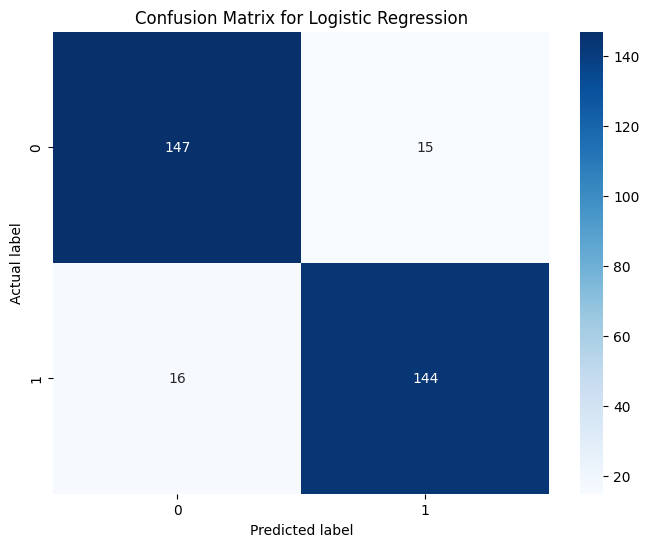

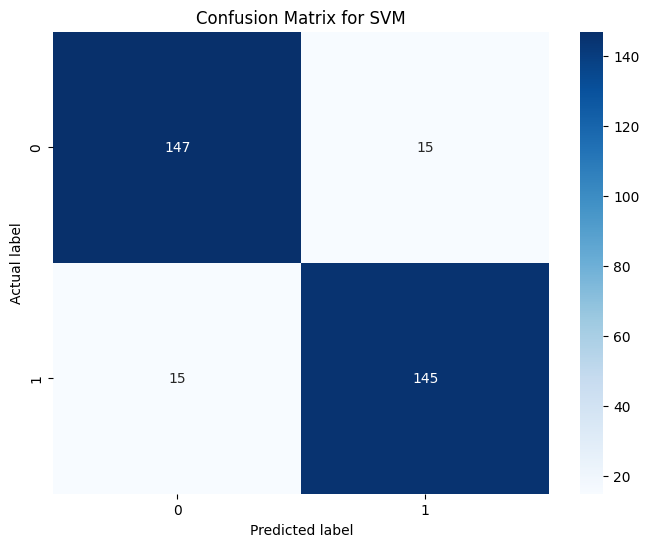

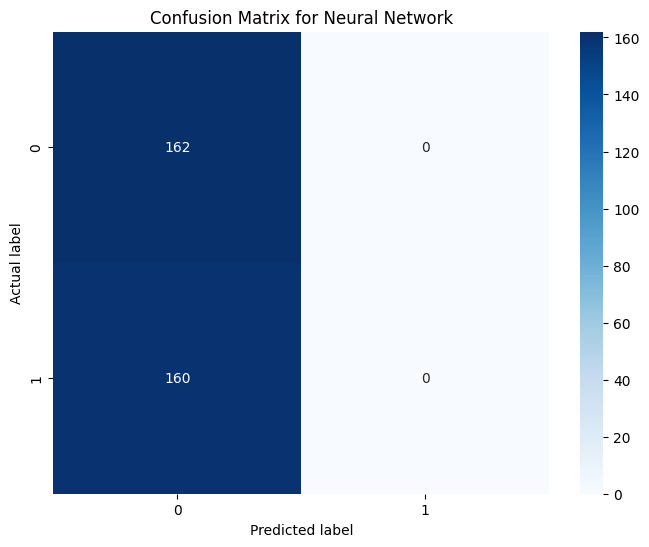

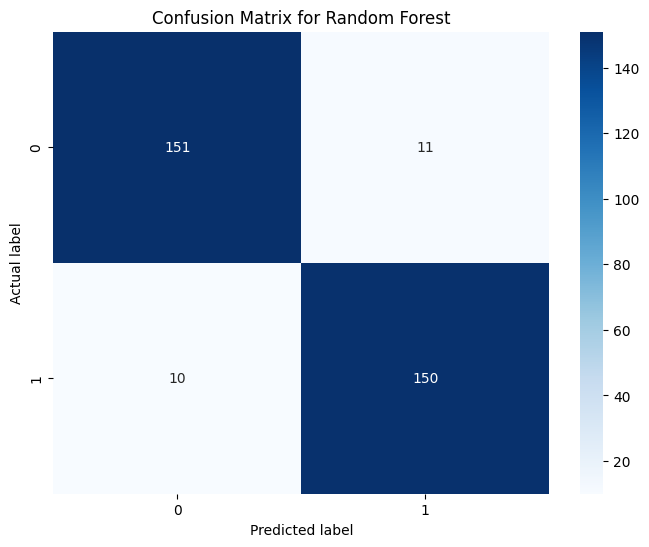

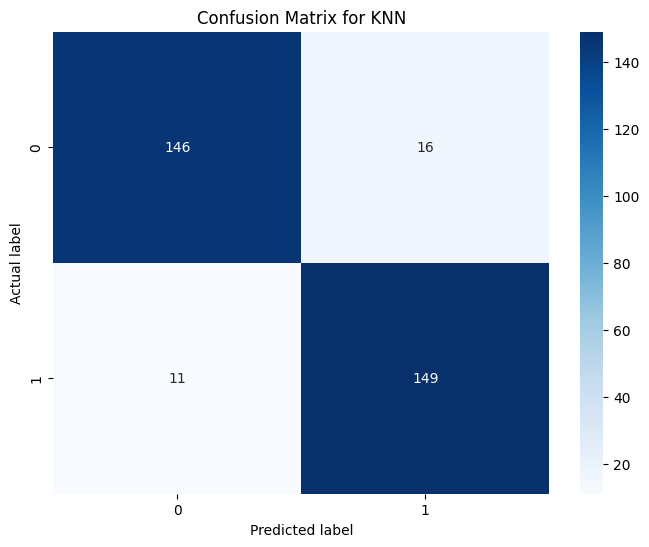

In [132]:

# Create confusion matrices for each model
cm_lr = confusion_matrix(y_test, y_predict_lr)
cm_svm = confusion_matrix(y_test, y_predict_svm)
cm_nn = confusion_matrix(y_test, y_predict_nn)
cm_rf = confusion_matrix(y_test, y_predict_rf)
cm_knn = confusion_matrix(y_test, y_predict_knn)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

# Plotting confusion matrices
plot_confusion_matrix(cm_lr, "Logistic Regression")
plot_confusion_matrix(cm_svm, "SVM")
plot_confusion_matrix(cm_nn, "Neural Network")
plot_confusion_matrix(cm_rf, "Random Forest")
plot_confusion_matrix(cm_knn, "KNN")

plt.show()


A confusion matrix is a tool often used in classification tasks to visualise the performance of an algorithm. Typically, it is a square matrix that compares the actual target values with the values predicted by the model. To provide a detailed explanation and interpretation, I will describe the common components of a confusion matrix:

True Positives (TP): These are cases where the model correctly predicts the positive class.

True Negatives (TN): These are cases where the model correctly predicts the negative class.

False Positives (FP), also known as Type I error: These are cases where the model incorrectly predicts the positive class.

False Negatives (FN), also known as Type II error: These are cases where the model incorrectly predicts the negative class.

The confusion matrix typically looks like this:

Actual \ Predicted	Positive Prediction	Negative Prediction
Actual Positive	              TP	         FN
Actual Negative	              FP	         TN


Interpretation:
Accuracy: (TP + TN) / (TP + TN + FP + FN). This measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions.

Precision: TP / (TP + FP). This measures how many of the items identified as positive were actually positive. It’s important in contexts where False Positives are more significant than False Negatives.

Recall (Sensitivity): TP / (TP + FN). This measures how many of the actual positive items were identified correctly. It’s important in contexts where False Negatives are more significant than False Positives.

F1 Score: 2 * (Precision * Recall) / (Precision + Recall). This is a harmonic mean of precision and recall and gives a balance between them.

Specificity: TN / (TN + FP). This measures the proportion of actual negatives that are correctly identified as such.

Contextual Importance:
In medical testing, high recall might be more important because missing a positive (disease) case (False Negative) could be more detrimental than a False Positive.
In spam detection, high precision might be more crucial because categorizing a legitimate email as spam (False Positive) is often seen as worse than not catching a spam email (False Negative).